In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
sklearn.__version__

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
import math
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.svm import SVR

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/DSC672/DATA/depart_non_cancelled.csv')


In [ ]:
df

,date,FlightNumber,TailNumber,DestinationAirport,Scheduleddeparturetime,Actualdeparturetime,ScheduledelapsedtimeMinutes,ActualelapsedtimeMinutes,DeparturedelayMinutes,Wheelsofftime,TaxiOuttimeMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,city,time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2016-01-01,325,N66831,IAD,13:53:00,13:58:00,132,122,5,14:10:00,12,0,0,0,0,0,33607,13,26,21,0.0,10.3,6,50,12:45 PM,1:04 PM,8:21 AM,6:46 PM,20,28,28,26,19,6,67,0.0,1018,26,10,244,14
1,2016-01-01,542,N521NK,ATL,13:36:00,14:19:00,86,88,43,14:32:00,13,8,0,2,0,35,33607,13,26,21,0.0,10.3,6,50,12:45 PM,1:04 PM,8:21 AM,6:46 PM,20,28,28,26,19,6,67,0.0,1018,26,10,244,14
2,2016-01-01,1373,N971DL,ATL,13:45:00,13:41:00,96,83,-4,13:52:00,11,0,0,0,0,0,33607,13,26,21,0.0,10.3,6,50,12:45 PM,1:04 PM,8:21 AM,6:46 PM,20,28,28,26,19,6,67,0.0,1018,26,10,244,14
3,2016-01-01,352,N75436,IAD,19:27:00,20:00:00,132,113,33,20:09:00,9,0,0,0,0,0,33607,19,26,21,0.0,10.3,6,50,12:45 PM,1:04 PM,8:21 AM,6:46 PM,20,22,24,22,27,51,90,0.0,1019,22,10,344,19
4,2016-01-01,871,N803AW,LAX,19:05:00,19:24:00,343,316,19,19:38:00,14,0,0,0,0,0,33607,19,26,21,0.0,10.3,6,50,12:45 PM,1:04 PM,8:21 AM,6:46 PM,20,22,24,22,27,51,90,0.0,1019,22,10,344,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279261,2020-12-31,454,N68842,IAD,23:00:00,22:49:00,298,304,-11,23:03:00,14,0,0,0,0,0,94128,23,13,10,0.0,9.8,3,89,7:41 PM,9:52 AM,8:24 AM,6:02 PM,9,10,11,10,11,12,82,0.0,1020,11,10,339,7
1279262,2020-12-31,505,N75428,IAH,0:16:00,0:14:00,218,230,-2,0:42:00,28,0,0,0,0,0,94128,0,13,10,0.0,9.8,3,89,7:41 PM,9:52 AM,8:24 AM,6:02 PM,9,9,11,9,22,87,86,0.1,1023,11,3,223,15
1279263,2020-12-31,1857,N57863,ORD,0:05:00,23:57:00,243,236,-8,0:11:00,14,0,0,0,0,0,94128,0,13,10,0.0,9.8,3,89,7:41 PM,9:52 AM,8:24 AM,6:02 PM,9,9,11,9,22,87,86,0.1,1023,11,3,223,15
1279264,2020-12-31,516,N73270,IAD,11:00:00,10:50:00,302,295,-10,11:09:00,19,0,0,0,0,0,94128,11,13,10,0.0,9.8,3,89,7:41 PM,9:52 AM,8:24 AM,6:02 PM,7,10,12,10,15,2,73,0.0,1022,12,10,158,12


In [ ]:

DNC_ne = df.drop(['date','DestinationAirport','TailNumber','FlightNumber', 'Scheduleddeparturetime', 'Actualdeparturetime', 'ScheduledelapsedtimeMinutes','TaxiOuttimeMinutes','city','time','maxtempC','mintempC','sunHour','ActualelapsedtimeMinutes', 'Wheelsofftime', 'moonrise', 'moonset','sunrise','sunset'], axis = 1)

In [ ]:
delay = DNC_ne['DeparturedelayMinutes'] > 14
print(delay)

0          False
1           True
2          False
3           True
4           True
           ...  
1279261    False
1279262    False
1279263    False
1279264    False
1279265    False
Name: DeparturedelayMinutes, Length: 1279266, dtype: bool


In [ ]:
DNC_new = DNC_ne[delay]
DNC_new

,DeparturedelayMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,totalSnow_cm,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
1,43,8,0,2,0,35,0.0,6,50,20,28,28,26,19,6,67,0.0,1018,26,10,244,14
3,33,0,0,0,0,0,0.0,6,50,20,22,24,22,27,51,90,0.0,1019,22,10,344,19
4,19,0,0,0,0,0,0.0,6,50,20,22,24,22,27,51,90,0.0,1019,22,10,344,19
23,37,16,0,0,0,0,0.0,6,20,16,19,21,19,26,25,81,0.0,1022,19,10,134,17
31,18,0,0,0,0,0,0.0,6,20,18,21,23,21,12,4,81,0.0,1021,21,10,201,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279214,18,0,0,0,0,0,0.0,4,9,4,9,11,9,16,7,64,0.0,1014,11,10,78,14
1279215,28,23,0,0,0,0,0.0,4,9,4,9,11,9,16,7,64,0.0,1014,11,10,78,14
1279224,20,0,0,0,0,0,0.0,3,86,11,12,12,12,5,54,89,0.0,1021,12,10,181,4
1279228,15,0,0,0,0,0,0.0,3,86,7,14,14,14,6,60,61,0.0,1019,14,10,136,5


In [ ]:
from sklearn.preprocessing import StandardScaler as scaler
data_scaled = scaler().fit_transform(DNC_new)

data_scaled = pd.DataFrame(data_scaled)
data_scaled.columns = DNC_new.columns


In [ ]:
data_scaled 

,DeparturedelayMinutes,DelayCarrierMinutes,DelayWeatherMinutes,DelayNationalAviationSystemMinutes,DelaySecurityMinutes,DelayLateAircraftArrivalMinutes,totalSnow_cm,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,-0.307777,-0.180431,-0.122959,-0.351091,-0.030396,0.239729,-0.11173,0.583205,0.101575,0.994899,0.791630,0.803847,0.735516,0.170659,-0.843022,0.153997,-0.322487,0.346799,0.759741,0.455969,0.529181,0.198240
1,-0.429920,-0.321166,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,0.583205,0.101575,0.994899,0.293683,0.428211,0.381466,0.924444,0.494811,1.314426,-0.322487,0.508499,0.353045,0.455969,1.682274,0.898968
2,-0.600921,-0.321166,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,0.583205,0.101575,0.994899,0.293683,0.428211,0.381466,0.924444,0.494811,1.314426,-0.322487,0.508499,0.353045,0.455969,1.682274,0.898968
3,-0.381063,-0.039695,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,0.583205,-0.859325,0.574513,0.044710,0.146484,0.115928,0.830220,-0.278159,0.860345,-0.322487,0.993600,0.048022,0.455969,-0.739221,0.618677
4,-0.613135,-0.321166,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,0.583205,-0.859325,0.784706,0.210692,0.334302,0.292953,-0.488903,-0.902481,0.860345,-0.322487,0.831900,0.251371,0.455969,0.033351,-0.922924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228079,-0.613135,-0.321166,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,-0.470057,-1.211654,-0.686646,-0.785201,-0.792606,-0.769198,-0.112011,-0.813293,0.002637,-0.322487,-0.300002,-0.765371,0.455969,-1.384953,0.198240
228080,-0.490992,0.083449,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,-0.470057,-1.211654,-0.686646,-0.785201,-0.792606,-0.769198,-0.112011,-0.813293,0.002637,-0.322487,-0.300002,-0.765371,0.455969,-1.384953,0.198240
228081,-0.588707,-0.321166,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,-0.996688,1.254655,0.049030,-0.536228,-0.698697,-0.503660,-1.148465,0.584000,1.263973,-0.322487,0.831900,-0.663697,0.455969,-0.197267,-1.203215
228082,-0.649778,-0.321166,-0.122959,-0.398690,-0.030396,-0.445688,-0.11173,-0.996688,1.254655,-0.371356,-0.370246,-0.510879,-0.326635,-1.054242,0.762377,-0.148723,-0.322487,0.508499,-0.460348,0.455969,-0.716159,-1.063070


In [ ]:
X = data_scaled.drop('DeparturedelayMinutes', axis=1)

In [ ]:
y = data_scaled.DeparturedelayMinutes

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X,y,  test_size=0.30, random_state=50000)

In [ ]:
data_scaled.to_csv('depREG.csv')

KeyboardInterrupt: ignored

In [ ]:
X_train.to_csv('DEPregTrNS.csv')

In [ ]:
X_val.to_csv('DEPregValNS.csv')

In [ ]:
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model = ExtraTreesRegressor()
model.fit(X_train, Y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
model.predict(X_train)

array([ 2.90459741,  0.26629783,  0.96251577, ..., -0.38106272,
        0.64494267,  0.63272832])

In [ ]:
model.predict(X_val)

array([ 0.84489158, -0.33000674, -0.25659849, ..., -0.55747865,
        0.56994657, -0.54754431])

In [ ]:
model.score(X_train, Y_train)

0.998064827395674

In [ ]:
model.score(X_val, Y_val)

0.9507211351295477

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model2 = RandomForestRegressor()

In [ ]:
model2.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model2.score(X_train, Y_train)

0.9922529345555433

In [ ]:
model2.score(X_val, Y_val)

0.9505434590352292

In [ ]:
 random_grid = {'n_estimators': [5, 50, 100, 200, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 8, 10]}

{'n_estimators': [5, 50, 100, 200, 400], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 6, 8, 10]}


In [ ]:
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50 , cv= 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(X_val,Y_val)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 40 is smaller than n_iter=50. Running 40 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] n_estimators=5, max_features=auto, max_depth=2 ..................
[CV] ... n_estimators=5, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=5, max_features=auto, max_depth=2 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ... n_estimators=5, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=5, max_features=auto, max_depth=2 ..................
[CV] ... n_estimators=5, max_features=auto, max_depth=2, total=   0.2s
[CV] n_estimators=50, max_features=auto, max_depth=2 .................
[CV] .. n_estimators=50, max_features=auto, max_depth=2, total=   2.1s
[CV] n_estimators=50, max_features=auto, max_depth=2 .................
[CV] .. n_estimators=50, max_features=auto, max_depth=2, total=   2.1s
[CV] n_estimators=50, max_features=auto, max_depth=2 .................
[CV] .. n_estimators=50, max_features=auto, max_depth=2, total=   2.1s
[CV] n_estimators=100, max_features=auto, max_depth=2 ................
[CV] . n_estimators=100, max_features=auto, max_depth=2, total=   4.2s
[CV] n_estimators=100, max_features=auto, max_depth=2 ................
[CV] . n_estimators=100, max_features=auto, max_depth=2, total=   4.1s
[CV] n_estimators=100, max_features=auto, max_depth=2 ................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 24.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
model3 = RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=None, verbose=0,
                                                   warm_start=False)

In [ ]:
model3.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model3.score(X_train, Y_train)

0.9921874072424883

In [ ]:
model3.score(X_val, Y_val)

0.9507329368867427

Feature: 0, Score: 0.40857
Feature: 1, Score: 0.08940
Feature: 2, Score: 0.13764
Feature: 3, Score: 0.00066
Feature: 4, Score: 0.32663
Feature: 5, Score: 0.00137
Feature: 6, Score: 0.00430
Feature: 7, Score: 0.00227
Feature: 8, Score: 0.00135
Feature: 9, Score: 0.00134
Feature: 10, Score: 0.00123
Feature: 11, Score: 0.00298
Feature: 12, Score: 0.00365
Feature: 13, Score: 0.00385
Feature: 14, Score: 0.00136
Feature: 15, Score: 0.00323
Feature: 16, Score: 0.00118
Feature: 17, Score: 0.00076
Feature: 18, Score: 0.00564
Feature: 19, Score: 0.00259


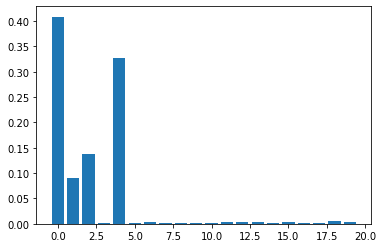

In [ ]:
importance = model3.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159658 entries, 84831 to 149376
Data columns (total 20 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   DelayCarrierMinutes                 159658 non-null  float64
 1   DelayWeatherMinutes                 159658 non-null  float64
 2   DelayNationalAviationSystemMinutes  159658 non-null  float64
 3   DelaySecurityMinutes                159658 non-null  float64
 4   DelayLateAircraftArrivalMinutes     159658 non-null  float64
 5   uvIndex                             159658 non-null  float64
 6   moon_illumination                   159658 non-null  float64
 7   DewPointC                           159658 non-null  float64
 8   FeelsLikeC                          159658 non-null  float64
 9   HeatIndexC                          159658 non-null  float64
 10  WindChillC                          159658 non-null  float64
 11  WindGustKmph          